In [2]:
!which jupyter


/home/mllab/anaconda3/envs/md/bin/jupyter


In [11]:
!conda install matplotlib -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



## Package Plan ##

  environment location: /home/mllab/anaconda3/envs/md

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    contourpy-1.0.5            |   py38hdb19cb5_0         203 KB
    importlib_resources-6.1.1  |   py38h06a4308_1          54 KB
    kiwisolver-1.4.4           |   py38h6a678d5_0          76 KB
    libedit-3.1.20230828       |       h5eee18b_0         179 KB
    matplotlib-3.7.2           |   py38h06a4308_0           8 KB
    matplotlib-base-3.7.2      |   py38h1128e8f_0         6.7 MB
    pillow-10.0.1              

# dmf 1

refP e[-1]-1569.831439569446
refP A + B: -1569.8339189266098
S         -0.5739217     -0.0137168     -0.2990417
Na        7.0060578    -11.7329799     -0.4519178
O         -2.2801183     -4.2757230     -0.8997387
O         -0.5713959     -3.0064292      1.7018066
O         -4.1714576     -3.6678302      0.1783872
O         1.0736501     -2.7686684      0.1707035
O         -1.7321946      0.6991869     -0.9736679
O         -0.6004768      0.3698525      1.1670826
O         0.7215314      0.1277672     -0.9676829
C         -2.9349252     -3.4419515     -0.3126966
C         -2.5098235     -2.0088092     -0.0552228
C         -1.0278964     -1.8077463     -0.3516435
C         -0.1697214     -2.5918819      0.6354914
C         1.9693839     -3.4653168      1.0525878
C         -4.6791771     -4.9973501     -0.0264546
H         -2.7269629     -1.7610448      0.9874471
H         -3.1069268     -1.3491095     -0.6931543
H         -0.7809548     -2.1197110     -1.3687584
H         2.9222726     -

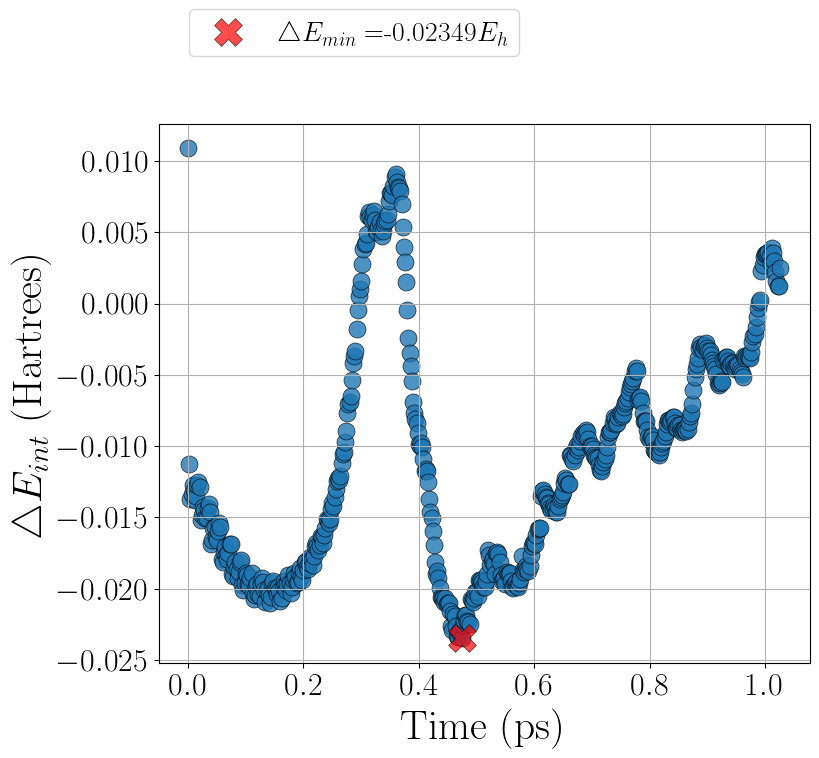

aot-dmf1-bg.pdf


In [13]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

# path_grl0 = "/home/antonio/SIMS/aot-dmf-2"
# aot-dmf-1
path_grl0 = "/data/mllab/SIMS/aot_solventes/aot-dmf-1"

plabel = "dmf1"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 34
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")


# -248.589025296097
refP = (-1321.244893630513) + (-248.589025296097) # forma E alone no def
print(f"refP A + B: {refP}")

# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



refP e[-1]-1568.527308724829
refP A + B: -1569.8339189266098
S         0.1168714      1.1550751     -0.4575514
Na        4.0466142    -12.2357352     -0.2026129
O         -2.7476204     -2.4636248     -0.8267239
O         -0.6688396     -1.6325018      1.6805612
O         -4.3539750     -1.2994367      0.2565699
O         0.9276570     -1.9345667      0.1098683
O         -0.8115307      2.1414400     -1.1433046
O         0.2458636      1.5879891      0.9892559
O         1.3776898      0.8947136     -1.1559720
C         -3.1200436     -1.4552767     -0.2673286
C         -2.2975177     -0.1938143     -0.0850070
C         -0.8294904     -0.4355657     -0.4178330
C         -0.1992315     -1.3922750      0.5888069
C         1.6154729     -2.8222391      1.0066531
C         -5.2245915     -2.4360499      0.1234665
H         -2.4029006      0.1466604      0.9487077
H         -2.7021000      0.5830082     -0.7419963
H         -0.7130963     -0.8449879     -1.4237277
H         2.5011223     -3.

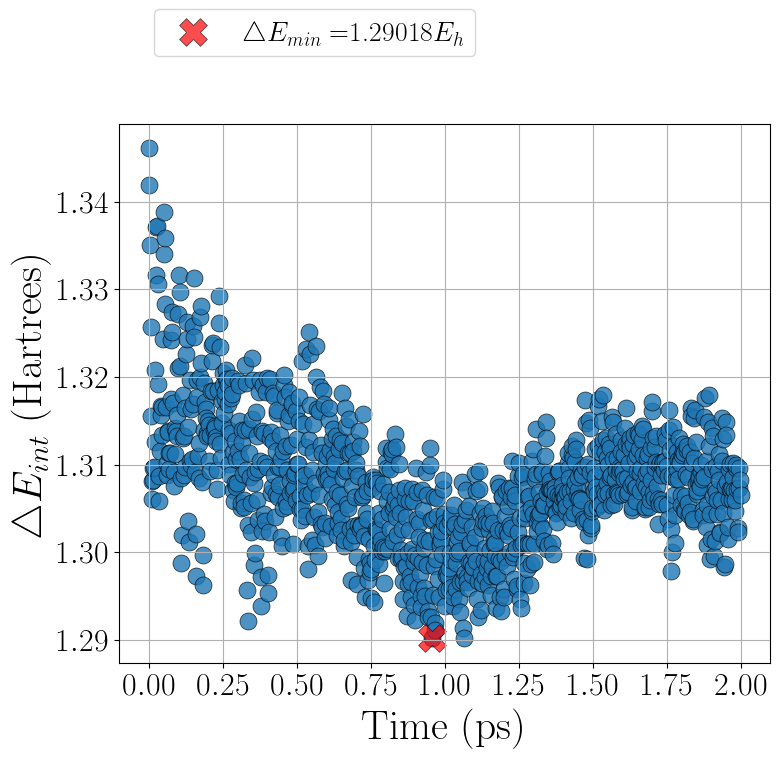

aot-dmf2-bg.pdf


In [12]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

# path_grl0 = "/home/antonio/SIMS/aot-dmf-2"
path_grl0 = "/data/mllab/SIMS/aot_solventes/aot-dmf-2"

plabel = "dmf2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 34
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")


# -248.589025296097
refP = (-1321.244893630513) + (-248.589025296097) # forma E alone no def
print(f"refP A + B: {refP}")

# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



refP e[-1]-1874.519929762138
refP A + B: -1874.494339194568
S         -0.7831361     -0.2057112     -0.2723765
Na        7.7413499    -11.2562183     -0.4724493
O         -2.1264622     -4.5880290     -0.9261377
O         -0.5475491     -3.2075779      1.7006980
O         -4.0693899     -4.1492290      0.1422910
O         1.0832615     -2.8195472      0.1851543
O         -1.9914898      0.4156337     -0.9496946
O         -0.8519804      0.1598591      1.1969674
O         0.5009921      0.0489658     -0.9292276
C         -2.8522514     -3.8170735     -0.3367117
C         -2.5490578     -2.3563082     -0.0625953
C         -1.0867329     -2.0305198     -0.3452018
C         -0.1738162     -2.7507409      0.6415272
C         2.0271330     -3.4484408      1.0677513
C         -4.4638708     -5.5140805     -0.0789056
H         -2.7935175     -2.1376458      0.9805366
H         -3.1940453     -1.7419579     -0.6991938
H         -0.8074481     -2.3109487     -1.3631332
H         2.9838022     -3

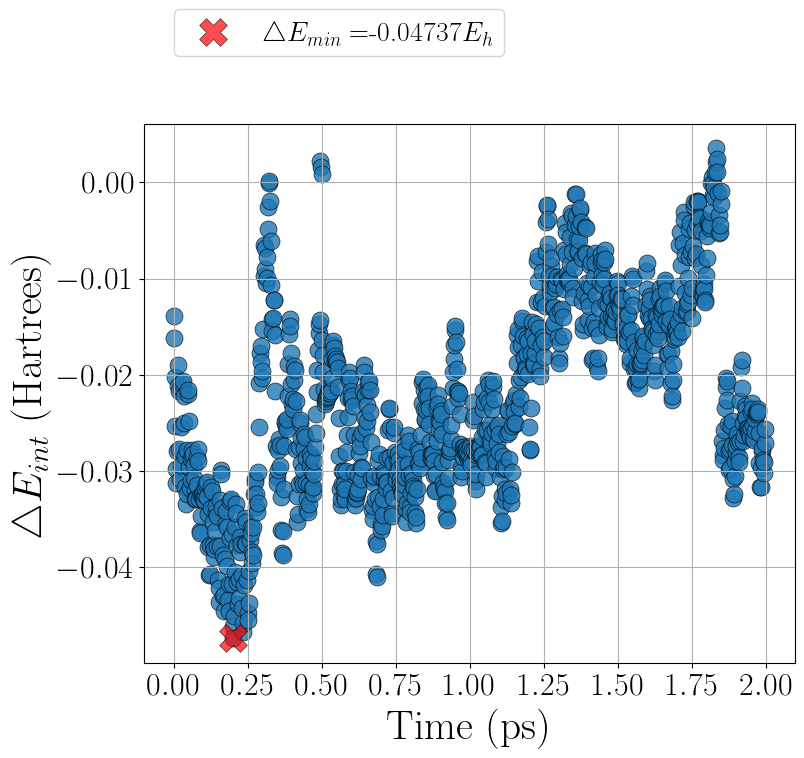

aot-dms1-bg.pdf


In [15]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

# path_grl0 = "/home/antonio/SIMS/dms-1"
path_grl0 = "/data/mllab/SIMS/aot_solventes/dms-1"


plabel = "dms1"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 34
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-553.249445564055) # forma E alone no def
print(f"refP A + B: {refP}")


# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



refP e[-1]-1874.546875041166
refP A + B: -1874.494339194568
S         -0.5106808      0.8283876     -0.2356076
Na        6.1786888    -11.4196806     -0.4757101
O         -2.5178300     -3.2835455     -0.9427047
O         -0.7668168     -2.1897327      1.7099162
O         -4.3779378     -2.5545824      0.1144901
O         0.9187753     -2.0494421      0.2112237
O         -1.6003623      1.6371216     -0.9164088
O         -0.5351632      1.1878984      1.2366366
O         0.8035872      0.8841221     -0.8797284
C         -3.1193567     -2.4133201     -0.3515726
C         -2.5936245     -1.0204905     -0.0608300
C         -1.0957337     -0.9255964     -0.3286274
C         -0.3162177     -1.7882635      0.6582503
C         1.7441466     -2.8258936      1.0951140
C         -4.9792946     -3.8388216     -0.1231263
H         -2.8105691     -0.7749645      0.9824099
H         -3.1283998     -0.3073154     -0.6965098
H         -0.8543088     -1.2377934     -1.3469944
H         2.7008718     -2

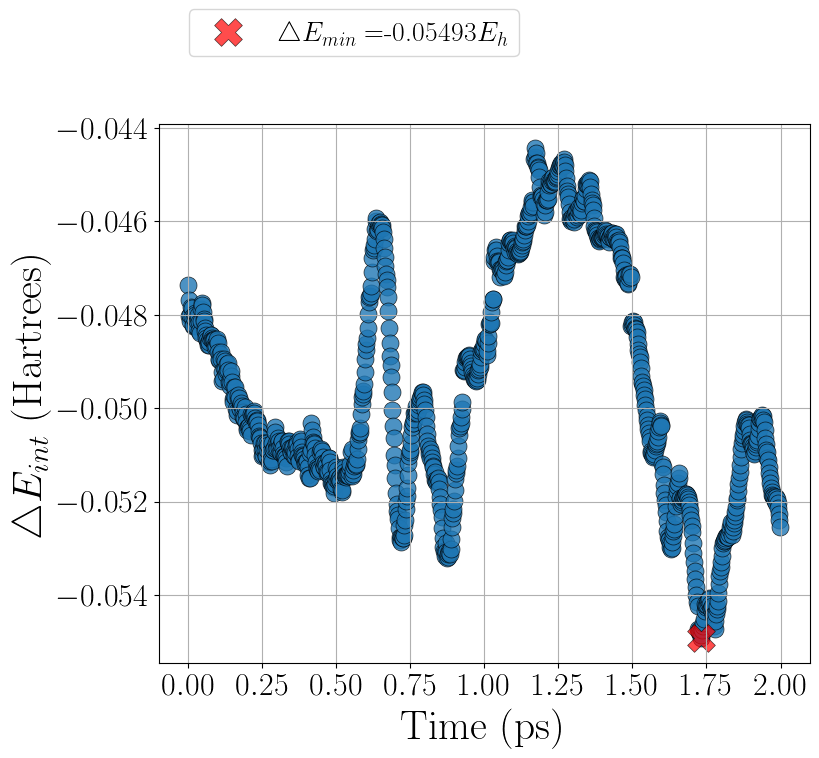

aot-dms2-bg.pdf


In [17]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

# path_grl0 = "/home/antonio/SIMS/aot-dms-2"
path_grl0 = "/data/mllab/SIMS/aot_solventes/aot-dms-2"

plabel = "dms2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 34
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-553.249445564055) # forma E alone no def
print(f"refP A + B: {refP}")


# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)

